In [3]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
# !cp drive/'My Drive'/radhakrishna.tar.gz /content
!cp drive/'My Drive'/Vehicle_Dataset.zip /content

In [6]:
!ls

drive  sample_data  Vehicle_Dataset.zip


In [7]:
# !tar -xvzf radhakrishna.tar.gz
!unzip Vehicle_Dataset.zip
print('end')

Streaming output truncated to the last 5000 lines.
  inflating: Vehicle_Dataset/Buses/images536.jpg  
  inflating: Vehicle_Dataset/Buses/images539.jpg  
  inflating: Vehicle_Dataset/Buses/images547.jpg  
  inflating: Vehicle_Dataset/Buses/images548.jpg  
  inflating: Vehicle_Dataset/Buses/images549.jpg  
  inflating: Vehicle_Dataset/Buses/images562.jpg  
  inflating: Vehicle_Dataset/Buses/images585.jpg  
  inflating: Vehicle_Dataset/Buses/images588.jpg  
  inflating: Vehicle_Dataset/Buses/images593.jpg  
  inflating: Vehicle_Dataset/Buses/images595.jpg  
  inflating: Vehicle_Dataset/Buses/images596.jpg  
  inflating: Vehicle_Dataset/Buses/images598.jpg  
  inflating: Vehicle_Dataset/Buses/images600.jpg  
  inflating: Vehicle_Dataset/Buses/images606.jpg  
  inflating: Vehicle_Dataset/Buses/images607.jpg  
  inflating: Vehicle_Dataset/Buses/images61.jpg  
  inflating: Vehicle_Dataset/Buses/images623.jpg  
  inflating: Vehicle_Dataset/Buses/images630.jpg  
  inflating: Vehicle_Dataset/Bus

In [8]:
!ls

drive  sample_data  Vehicle_Dataset  Vehicle_Dataset.zip


In [9]:
#!cd groupemotion/Aligned/ && ls
!cd Vehicle_Dataset && ls

 Buses	 car_jeep  'Mini bus'   Truck   WAGONS


In [11]:
!ls

drive  sample_data  Vehicle_Dataset  Vehicle_Dataset.zip


In [12]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Manipulation libraries
import numpy as np
import pandas as pd

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight

# Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import style
 
# Matplotlib configuration
%matplotlib inline  
style.use('fivethirtyeight')

# Keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import LambdaCallback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Dropout, Flatten, Activation, Reshape, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import PReLU
from keras.utils.data_utils import get_file

# Tensorflow
import tensorflow as tf

# Image manipulation libraries
import cv2                  
from PIL import Image

# Other libraries
import random
from tqdm import tqdm
import os
import itertools

# Set seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


In [13]:
# data
X = []
# labels
X_labels = []

# size of the image - 64x64
IMG_SIZE = 128

# assign variables for paths of each class
car_jeep_DIR ='Vehicle_Dataset/car_jeep'
Buses_DIR = 'Vehicle_Dataset/Buses'
Mini_bus_DIR = 'Vehicle_Dataset/Mini bus'
Truck_DIR = 'Vehicle_Dataset/Truck'
Wagons_DIR = 'Vehicle_Dataset/WAGONS'


In [14]:
# to check teh Directory 
car_jeep_DIR,  Buses_DIR, Wagons_DIR, Truck_DIR, Mini_bus_DIR

('Vehicle_Dataset/car_jeep',
 'Vehicle_Dataset/Buses',
 'Vehicle_Dataset/WAGONS',
 'Vehicle_Dataset/Truck',
 'Vehicle_Dataset/Mini bus')

In [15]:
def generate_data_from_images(Vehical_class, directory):
  # tqdm used for progress bar
  # for each image in the specified directory
  for image in tqdm(os.listdir(directory)):
    filename = os.fsdecode(image)
    if filename.endswith(".jpg"): 
      # read the colored image
      image = cv2.imread(os.path.join(directory, image))
      # resize image to 64x64
      image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
      
      # append the image as a numpy array to X
      X.append(np.array(image))
      # append the label to Z
      X_labels.append(Vehical_class)

In [16]:
generate_data_from_images('car_jeeb', car_jeep_DIR)

100%|██████████| 1201/1201 [00:32<00:00, 36.92it/s]


In [17]:
len(X), len(X_labels)

(1201, 1201)

In [18]:
generate_data_from_images('Buses', Buses_DIR)

100%|██████████| 1218/1218 [00:13<00:00, 90.08it/s] 


In [19]:
len(X), len(X_labels)

(2413, 2413)

In [20]:
generate_data_from_images('WAGONS', Wagons_DIR)

100%|██████████| 1200/1200 [00:10<00:00, 117.22it/s]


In [21]:
len(X), len(X_labels)

(3613, 3613)

In [22]:
generate_data_from_images('Mini bus', Mini_bus_DIR)

100%|██████████| 1208/1208 [00:06<00:00, 188.55it/s]


In [23]:
len(X), len(X_labels)

(4750, 4750)

In [24]:
generate_data_from_images('Truck', Truck_DIR)

100%|██████████| 1253/1253 [00:12<00:00, 98.45it/s]


In [25]:
len(X), len(X_labels)

(6003, 6003)

In [26]:
xx = np.array(X_labels)
xx = pd.DataFrame(xx)
xx.tail()

,0
5998,Truck
5999,Truck
6000,Truck
6001,Truck
6002,Truck


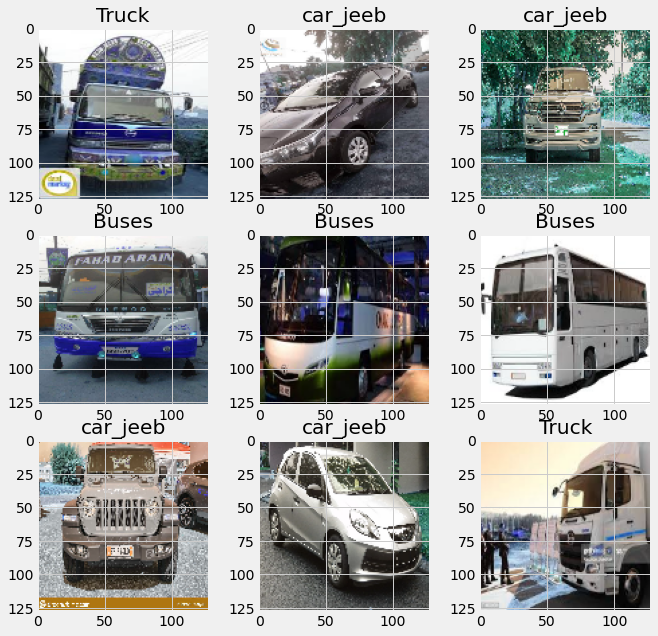

In [27]:
cols = 3
rows = 3
fig, axis = plt.subplots(rows, cols)
fig.set_size_inches(10, 10)
for i in range(rows):
  for j in range(cols):
    image_index = random.randint(0, len(X))
    axis[i, j].imshow(X[image_index])
    axis[i, j].set_title(X_labels[image_index])

In [29]:
# initialize the label encoder class
labelencoder = LabelEncoder()

# Convert the 3 classes "positive", "neutral" and "negative" into corresponding 
# numerical classes - 2, 1 and 0.
Y = labelencoder.fit_transform(X_labels)
# Check the classes applied by the Label Encoder
labelencoder_classes = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(labelencoder_classes)
# Apply one-hot encoding to convert the label encoded categorical data
# into multiple columns where each numerical class is replaced by 0 or 1
Y = to_categorical(Y,5)       # Y is the encoded label i-e.  0,0,1

# Convert X into a numpy array
X = np.array(X)
# Normalize all the pixel values for each image by diving by 255
X = X/255

{'Buses': 0, 'Mini bus': 1, 'Truck': 2, 'WAGONS': 3, 'car_jeeb': 4}


In [30]:
len(X), len(Y)

(6003, 6003)

In [33]:
Y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [35]:
aa = Y[1]
Y.shape, X.shape, aa.shape, aa

((6003, 5),
 (6003, 128, 128, 3),
 (5,),
 array([0., 0., 0., 0., 1.], dtype=float32))

In [43]:
num_features = 64
num_labels = 3
batch_size = 64
epochs = 30
width, height = 128, 128

#x = np.load('./fdataX.npy')
#y = np.load('./flabels.npy')

#x -= np.mean(x, axis=0)
#x /= np.std(x, axis=0)

#for xx in range(10):
#    plt.figure(xx)
#    plt.imshow(x[xx].reshape((48, 48)), interpolation='none', cmap='gray')
#plt.show()

#splitting into training, validation and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=41)

#saving the test samples to be used later
np.save('modXtest', X_test)
np.save('modytest', Y_test)

In [44]:
from tensorflow.keras import regularizers
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.models import Sequential

In [48]:
def get_cnn_model():
    model = Sequential()

    model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(128,128,3)))
                                                                    
    model.add(Convolution2D(64, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, (3, 1), padding='same'))
    model.add(Convolution2D(128, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Convolution2D(256, (3, 1), padding='same'))
    model.add(Convolution2D(256, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Convolution2D(512, (3, 1), padding='same'))
    model.add(Convolution2D(512, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(5))
    model.add(Activation('softmax'))
    return model

In [49]:
cnn_model = get_cnn_model()

In [50]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 64)      12352     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
activation_14 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 128)      

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import backend as K

In [52]:

def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 1

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

In [53]:
def train_cnn_model(model):
    #filepath='../opt/ger-cnn/Model.{epoch:02d}-{val_acc:.4f}.hdf5'
    #checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', cooldown=0, min_lr=0)
    early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,   # randomly flip images
        )


    datagen.fit(X_train)
    datagen.fit(X_test)    
    batch_size = 128

    num_epochs = 25
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=[fbeta, 'acc'])
    train_flow = datagen.flow(X_train, Y_train, batch_size=batch_size)
    test_flow = datagen.flow(X_test, Y_test)
    history = model.fit_generator(train_flow,
                    steps_per_epoch=len(X_train) / batch_size,
                    epochs=num_epochs, 
                    verbose=1, 
                    validation_data=test_flow, 
                    validation_steps=len(X_test) / batch_size,
                    #callbacks=[checkpointer, reduce_lr, checkpointer]
                    )
    return history, model

In [54]:
history, cnn_model = train_cnn_model(cnn_model)

Epoch 1/25
37/37 [==============================] - 52s 1s/step - loss: 1.6476 - fbeta: 0.2155 - acc: 0.3544 - val_loss: 1.8118 - val_fbeta: 0.1250 - val_acc: 0.1937
Epoch 2/25
37/37 [==============================] - 35s 917ms/step - loss: 1.2017 - fbeta: 0.3814 - acc: 0.5259 - val_loss: 2.0706 - val_fbeta: 0.1938 - val_acc: 0.1937
Epoch 3/25
37/37 [==============================] - 35s 913ms/step - loss: 1.0204 - fbeta: 0.4819 - acc: 0.5961 - val_loss: 1.8413 - val_fbeta: 0.1188 - val_acc: 0.2688
Epoch 4/25
37/37 [==============================] - 35s 914ms/step - loss: 0.8590 - fbeta: 0.5744 - acc: 0.6661 - val_loss: 2.5152 - val_fbeta: 0.1688 - val_acc: 0.2062
Epoch 5/25
37/37 [==============================] - 35s 915ms/step - loss: 0.8364 - fbeta: 0.5965 - acc: 0.6732 - val_loss: 2.6221 - val_fbeta: 0.2000 - val_acc: 0.2062
Epoch 6/25
37/37 [==============================] - 35s 919ms/step - loss: 0.7441 - fbeta: 0.6504 - acc: 0.7129 - val_loss: 3.2638 - val_fbeta: 0.2125 - val_a

In [57]:
def eval_model(history, model):
    batch_size = 32
    score = model.evaluate(X_test, Y_test, steps=(int)(len(X_test) / batch_size))
    print('Evaluation loss: ', score[0])
    print('Evaluation accuracy: ', score[1])
    # summarize history for accuracy
    plt.plot(history.history['acc'], color='b', label='Training')
    plt.plot(history.history['val_acc'], color='g', label='Validation')
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'], color='b', label='Training')
    plt.plot(history.history['val_loss'], color='g', label='Validation')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
    plt.show()
    y_pred = model.predict_classes(X_test)
    y_true = np.asarray([np.argmax(i) for i in Y_test])

18/18 [==============================] - 4s 127ms/step - loss: 0.4211 - fbeta: 0.8401 - acc: 0.8552
Evaluation loss:  0.4210934638977051
Evaluation accuracy:  0.8400824069976807


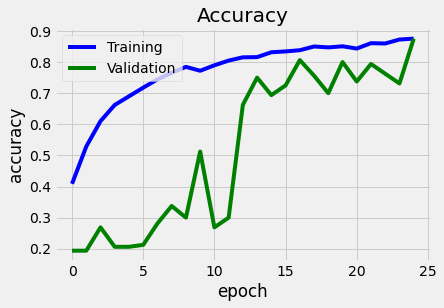

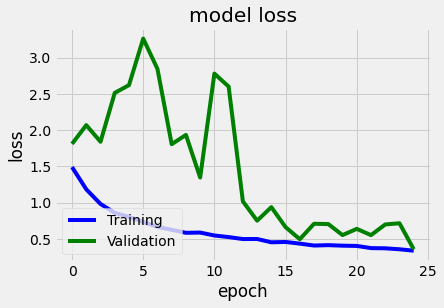

In [58]:
eval_model(history, cnn_model)

In [61]:
Y_train.shape, Y_test.shape

((4861, 5), (601, 5))

In [74]:
predication1 = cnn_model.predict(X_test)

724

Truck


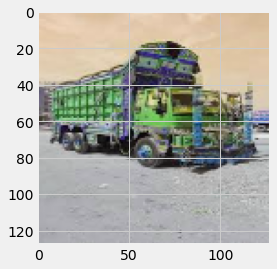

In [85]:
#{'Buses': 0, 'Mini bus': 1, 'Truck': 2, 'WAGONS': 3, 'car_jeeb': 4}
plot_catogary = ['Buses', 'Mini bus ', 'Truck', 'WAGONS', 'car_jeeb']
img_targ = 434
label_code = np.argmax(predication1[img_targ])
print(plot_catogary[label_code])
plt.imshow(X_test[img_targ])
plt.show()

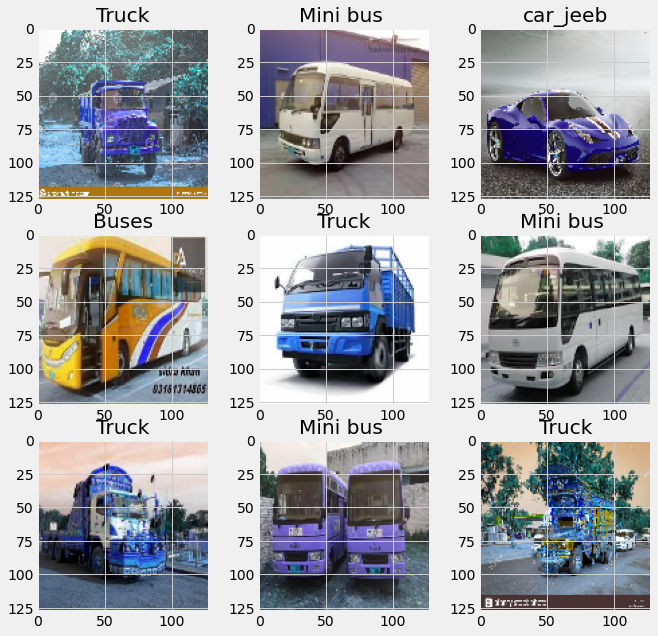

In [90]:
cols = 3
rows = 3
plot_catogary = ['Buses', 'Mini bus ', 'Truck', 'WAGONS', 'car_jeeb']
fig, axis = plt.subplots(rows, cols)
fig.set_size_inches(10, 10)
for i in range(rows):
  for j in range(cols):
    image_index = random.randint(0, len(X_test-50))
    label_code = np.argmax(predication1[image_index])
    axis[i, j].imshow(X_test[image_index])
    axis[i, j].set_title(plot_catogary[label_code])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Credit: https://github.com/scikit-learn/scikit-learn/blob/master/examples/model_selection/plot_confusion_matrix.py
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure()
plot_confusion_matrix(cm, classes=labelencoder.classes_)
plt.show()